#### Installing required packages

In [1]:
#Importing required libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
# import matplotlib

# %matplotlib qt

# Importing data from csv generated from HPC data

In [2]:
# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_iterations_species_richness.csv" in file]

['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversity.csv', 'w50_

In [3]:
# Import relevant files and store them as grid_dp
dfs = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file)) #.query('Iteration_Number == 99999')

    # Store the DataFrame with the name grid_dp
    dfs[dp] = df

    print(f"File '{file}' imported as '{dp}'")
    print(f'Table for {dp}: \n', df.head())
 


File 'w50_30dp_iterations_species_richness.csv' imported as '30dp'
Table for 30dp: 
    Iteration_Number  Species_Count                          Simulation  dp
0                 0              1  REvoSim_log_envw50_30dp_aj1283.txt  30
1                49              1  REvoSim_log_envw50_30dp_aj1283.txt  30
2                99              1  REvoSim_log_envw50_30dp_aj1283.txt  30
3               149              1  REvoSim_log_envw50_30dp_aj1283.txt  30
4               199              1  REvoSim_log_envw50_30dp_aj1283.txt  30
File 'w50_15dp_iterations_species_richness.csv' imported as '15dp'
Table for 15dp: 
    Unnamed: 0  Iteration_Number  Species_Count  \
0        2001                 0              1   
1        2002                49              1   
2        2003                99              1   
3        2004               149              1   
4        2005               199              1   

                           Simulation  dp  
0  REvoSim_log_envw50_15dp_aj1323.t

In [4]:
print (list(dfs.keys()))
# Create a new dictionary with integer keys so that I can better plot
dfs_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in dfs.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    dfs_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(dfs_int_keys.keys()))

['30dp', '15dp', '50dp', '20dp', '3dp', '40dp', '10dp', '35dp', '8dp', '4dp', '25dp', '6dp']
[30, 15, 50, 20, 3, 40, 10, 35, 8, 4, 25, 6]


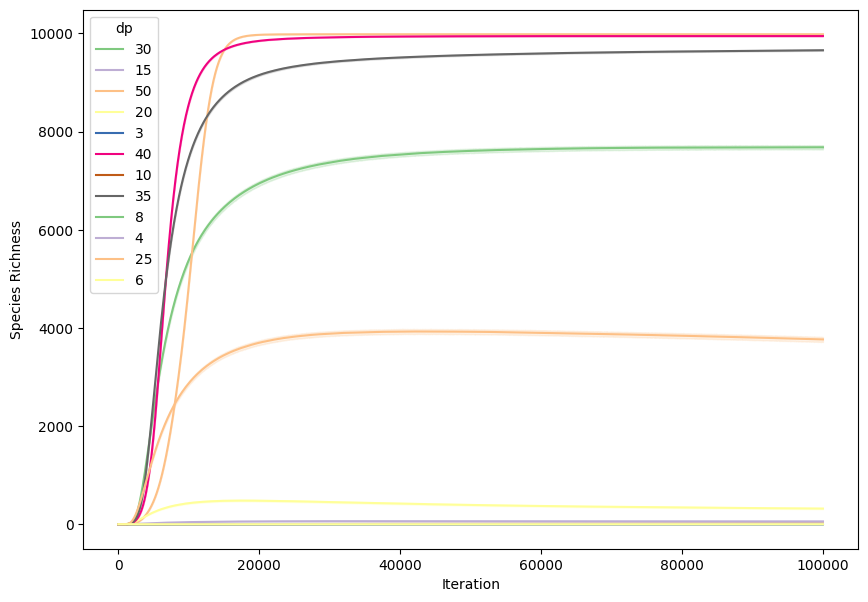

In [38]:
plt.figure(figsize=(10, 7))

# Get the accent palette colors
palette = sns.color_palette("Accent", len(dfs_int_keys))

# Iterate over both the DataFrame items and the palette colors
for index, ((dp, df), color) in enumerate(zip(dfs_int_keys.items(), palette)):
    sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', color=color, label=dp)

plt.xlabel("Iteration")
plt.ylabel("Species Richness")
plt.legend(title='dp')
plt.show()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


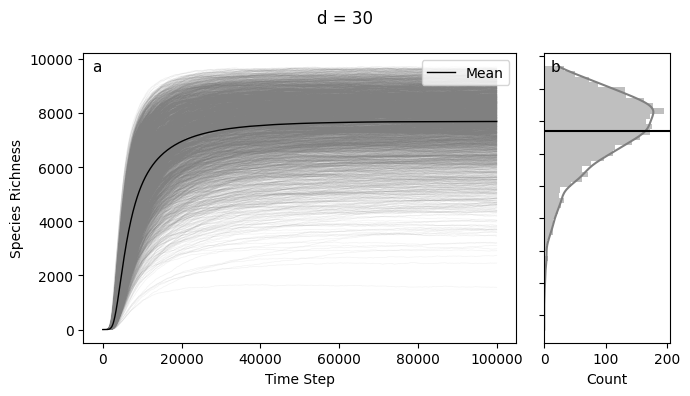

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


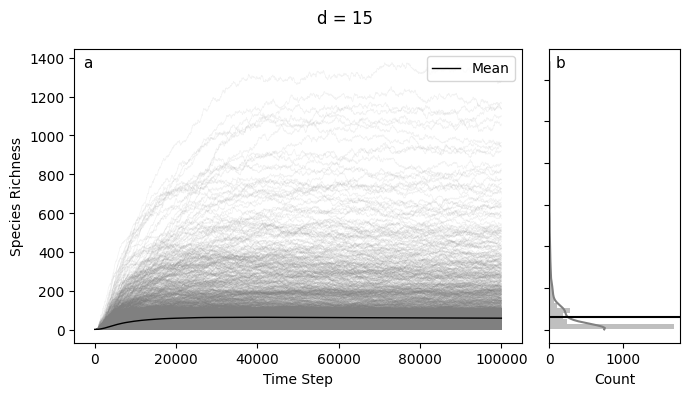

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


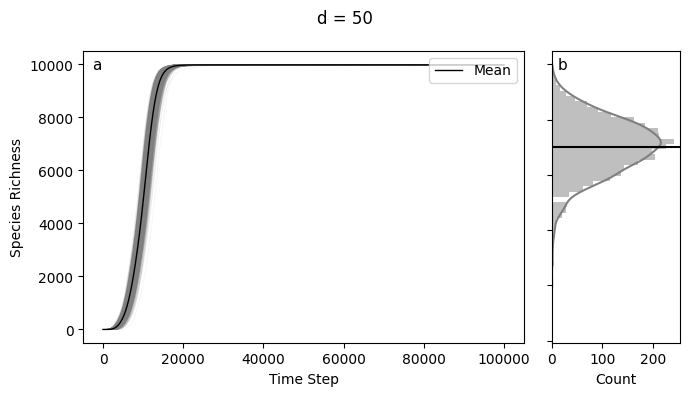

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2963) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


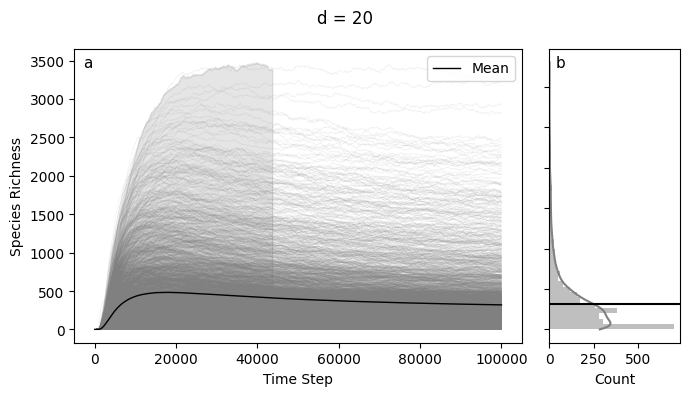

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


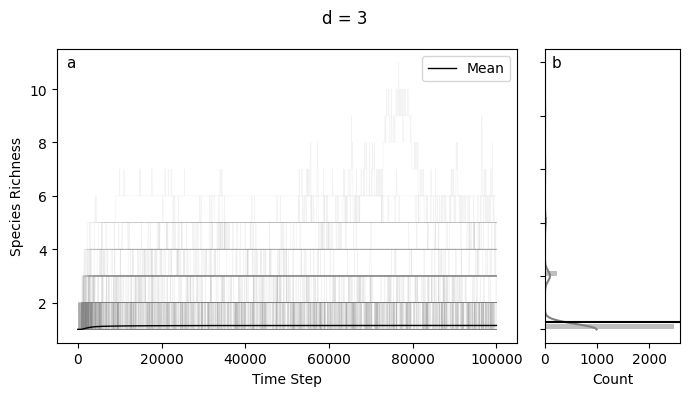

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


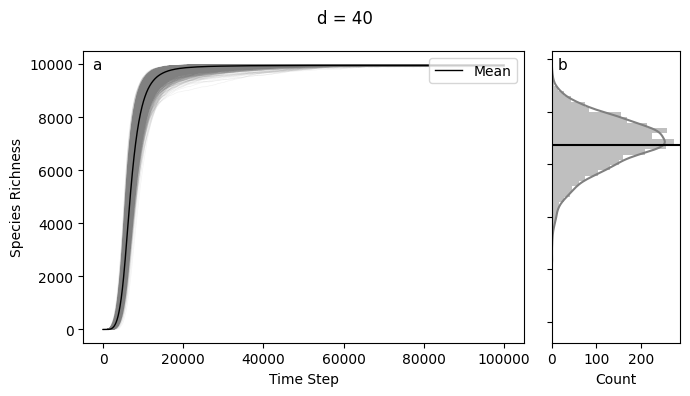

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


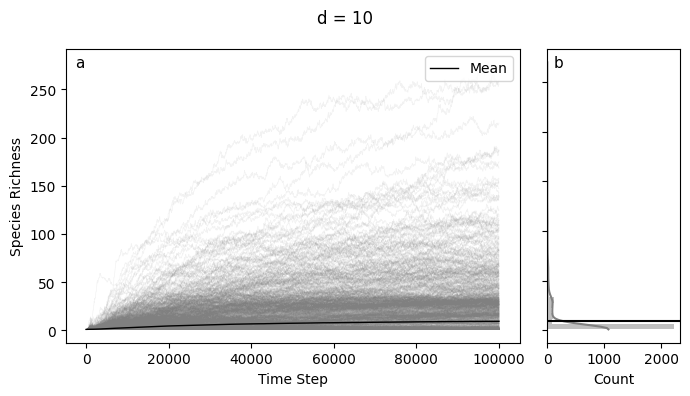

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


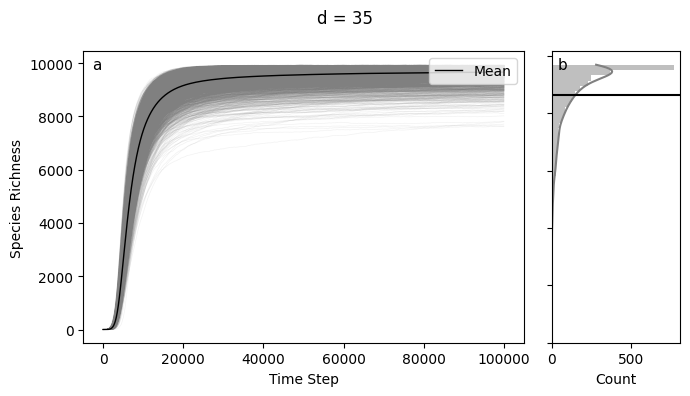

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


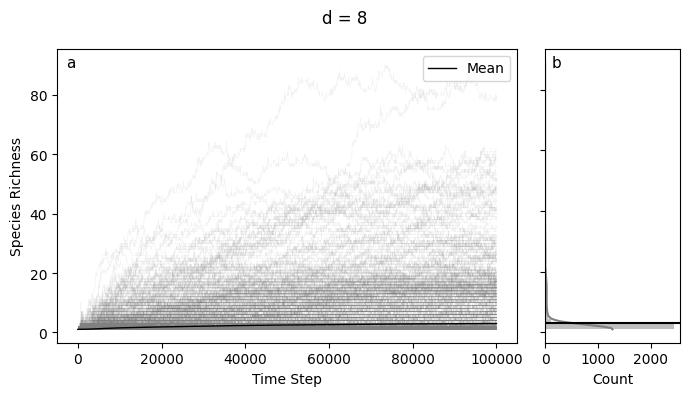

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


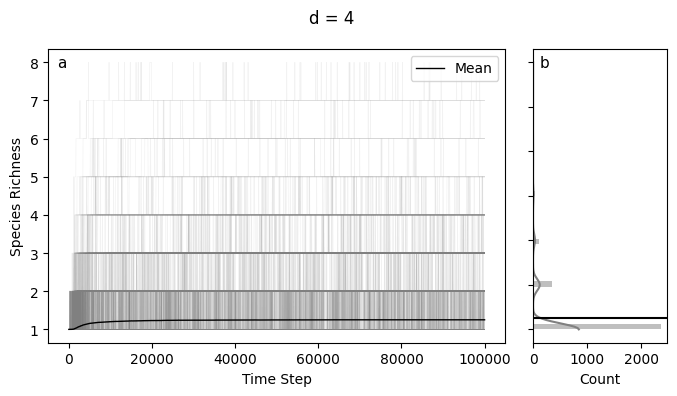

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2999) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


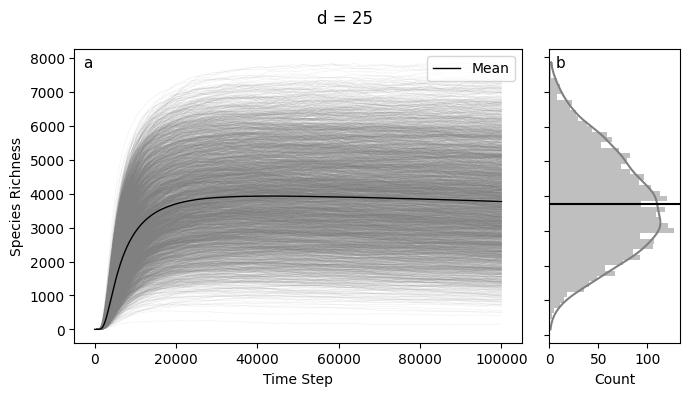

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6486/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


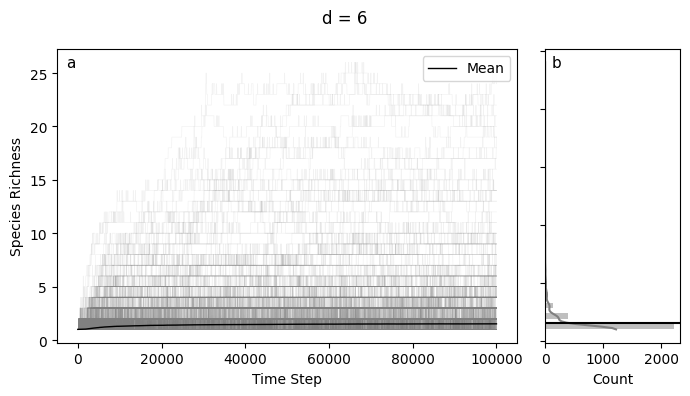

In [23]:
palette = ['gray']

for dp, df in dfs_int_keys.items():
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"d = {dp}", fontsize=12)
    plt.subplots_adjust(top=0.3)
    #greting a grid for the two plots
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = df.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1 , label='Mean')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')

    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=50, ax=ax_yDist, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax_yDist.axhline(y=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    
    #annotate a and b on the two panels
    ax_main.annotate('a', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    ax_yDist.annotate('b', xy=(0.05, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    # Set title and axis
    #ax_main.set_title(f"d = {environment}")
    ax_main.set_xlabel("Time Step")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.set_yticklabels([])
    ax_yDist.set_xlabel("Count")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

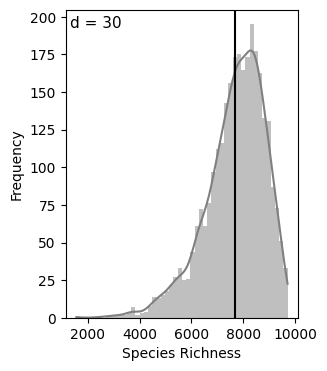

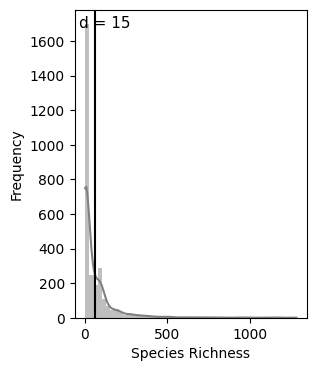

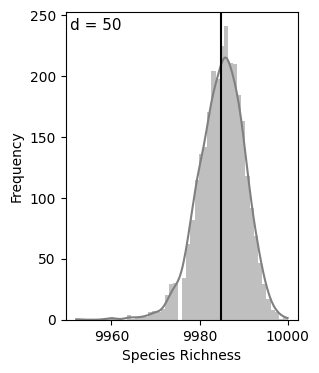

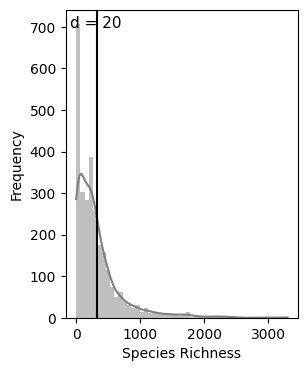

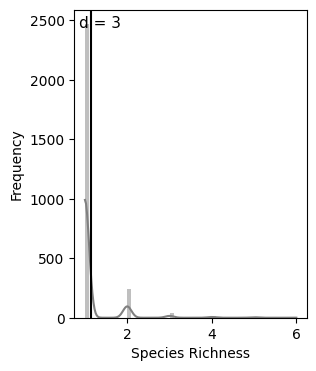

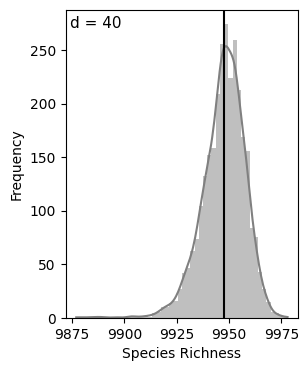

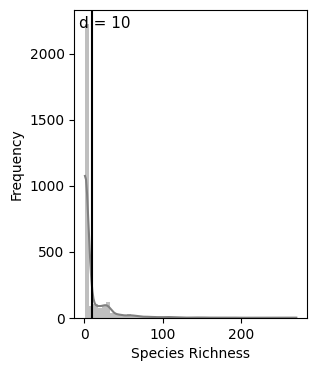

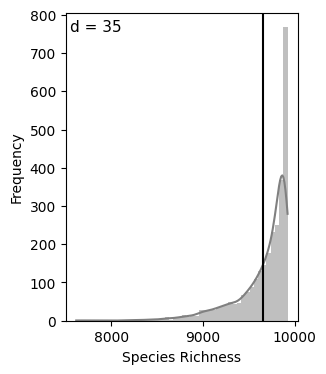

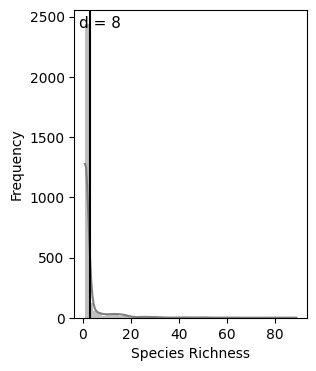

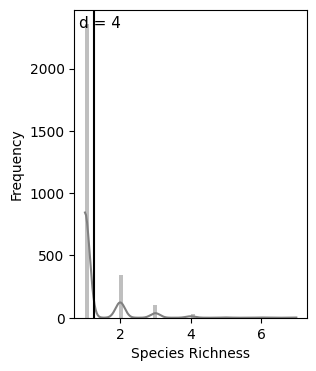

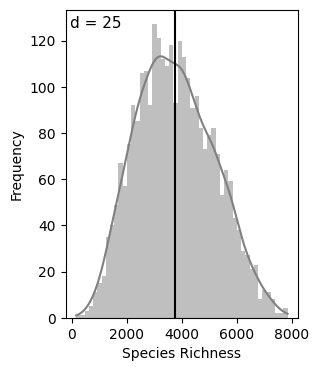

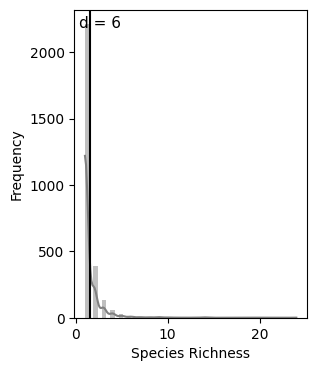

In [36]:
palette = ['gray']

for dp, df in dfs_int_keys.items():
    fig = plt.figure(figsize=(3, 4))
    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, x = 'Species_Count', bins=50, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    plt.annotate(f'd = {dp}', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    mean_hist = data_hist['Species_Count'].mean()
    plt.axvline(x=mean_hist, color='black', linewidth=1.5, label='Mean')
    plt.xlabel("Species Richness") 
    plt.ylabel("Frequency")
    

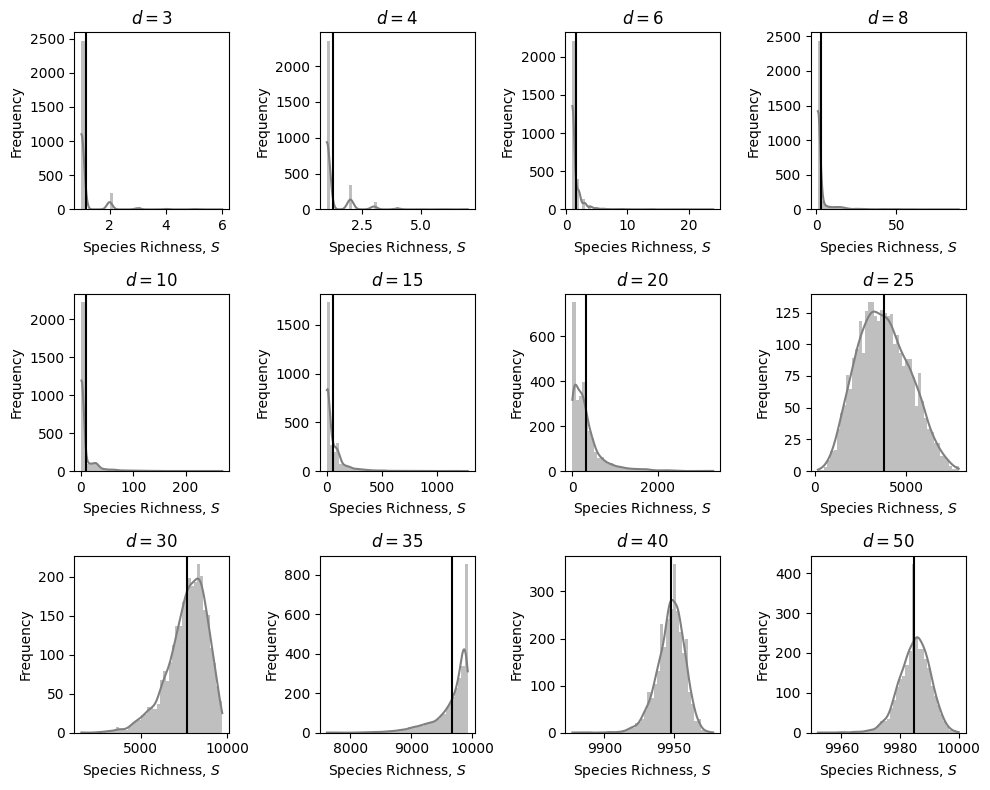

In [7]:
# Define the number of rows and columns for the subplot grid
num_rows = 3  # You can adjust these values based on your preference
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array if necessary
if num_rows == 1 and num_cols == 1:
    axes = [axes]

# Set the palette
palette = ['gray']

# Iterate over each (dp, df) pair and plot on subplots
for (dp, df), ax in zip(sorted(dfs_int_keys.items()), axes.flatten()):
    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    sns.histplot(data=data_hist, x='Species_Count', bins=45, color='gray', kde=True, edgecolor='none', ax=ax)
    
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax.axvline(x=mean_hist, color='black', linewidth=1.5, label='Mean')
    # ax.set_xlim(left=0)
    
    ax.set_xlabel("Species Richness, $S$")
    ax.set_ylabel("Frequency")
    ax.set_title(f'$d = {dp}$')

# Adjust layout
plt.tight_layout()
plt.show()


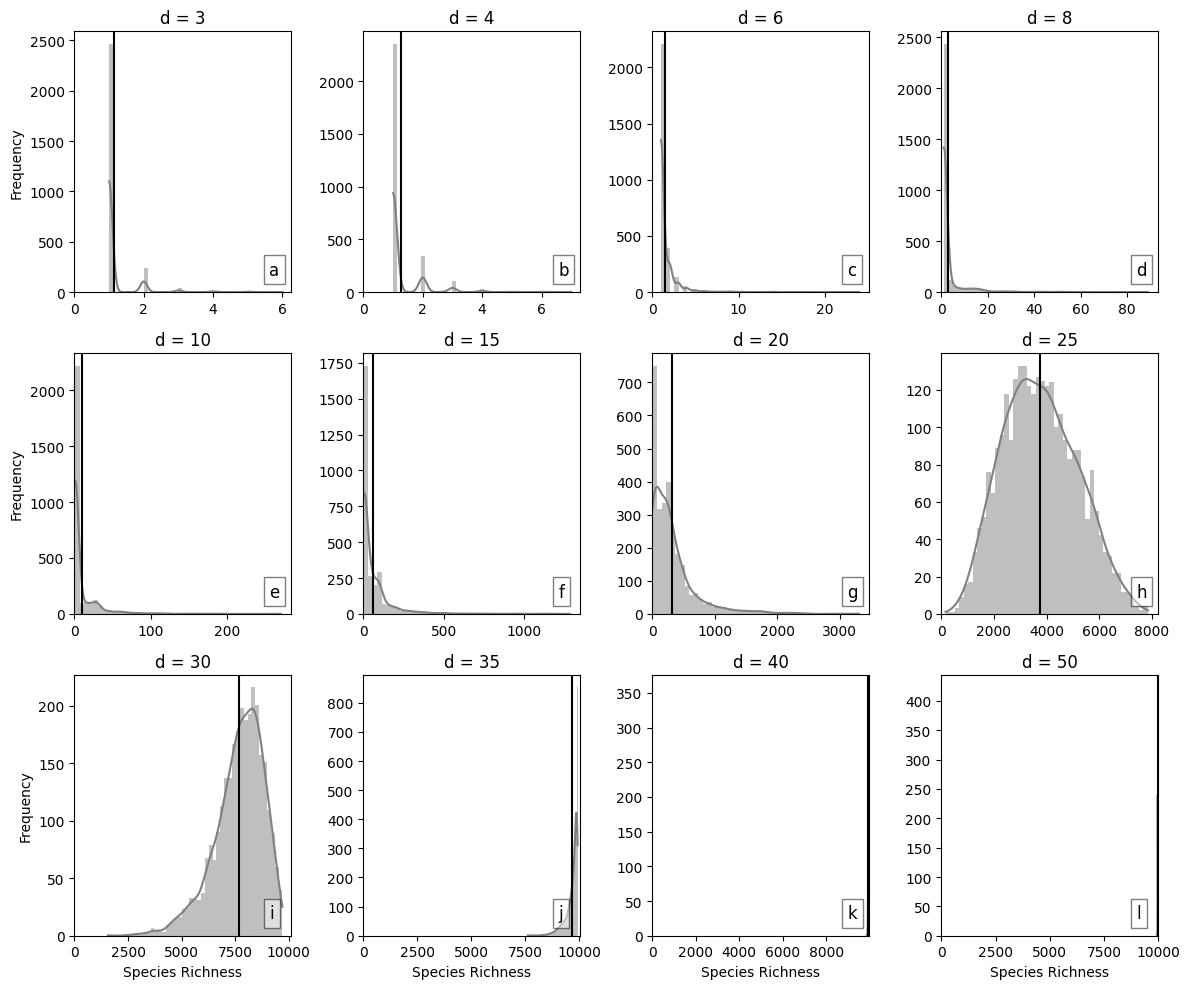

In [9]:
# Define the number of rows and columns for the subplot grid
num_rows = 3  # You can adjust these values based on your preference
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array if necessary
if num_rows == 1 and num_cols == 1:
    axes = [axes]

# Set the palette
palette = ['gray']

# Iterate over each (dp, df) pair and plot on subplots
for idx, ((dp, df), ax) in enumerate(zip(sorted(dfs_int_keys.items()), axes.flatten()), start=1):
    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    sns.histplot(data=data_hist, x='Species_Count', bins=45, color='gray', kde=True, edgecolor='none', ax=ax)
    
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax.axvline(x=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    ax.set_xlabel("Species Richness")
    ax.set_ylabel("Frequency")
    ax.set_title(f'd = {dp}')
    
    # Add letter annotation
    letter = chr(96 + idx)  # Get letter from ASCII value
    ax.text(0.9, 0.12, f"{letter}", transform=ax.transAxes, fontsize=12, va='top',bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    # Remove x labels from first and second row
    if ax in axes[0] or ax in axes[1]:
        ax.set_xlabel('')
    
    # Remove y labels from second, third, and fourth columns
    if ax in axes[:, 1:] and ax not in axes[:, 0]:
        ax.set_ylabel('')
        
    # Adding custum limits to the x-axis
    ax.set_xlim(left=0)

# Adjust layout
plt.tight_layout()
plt.show()


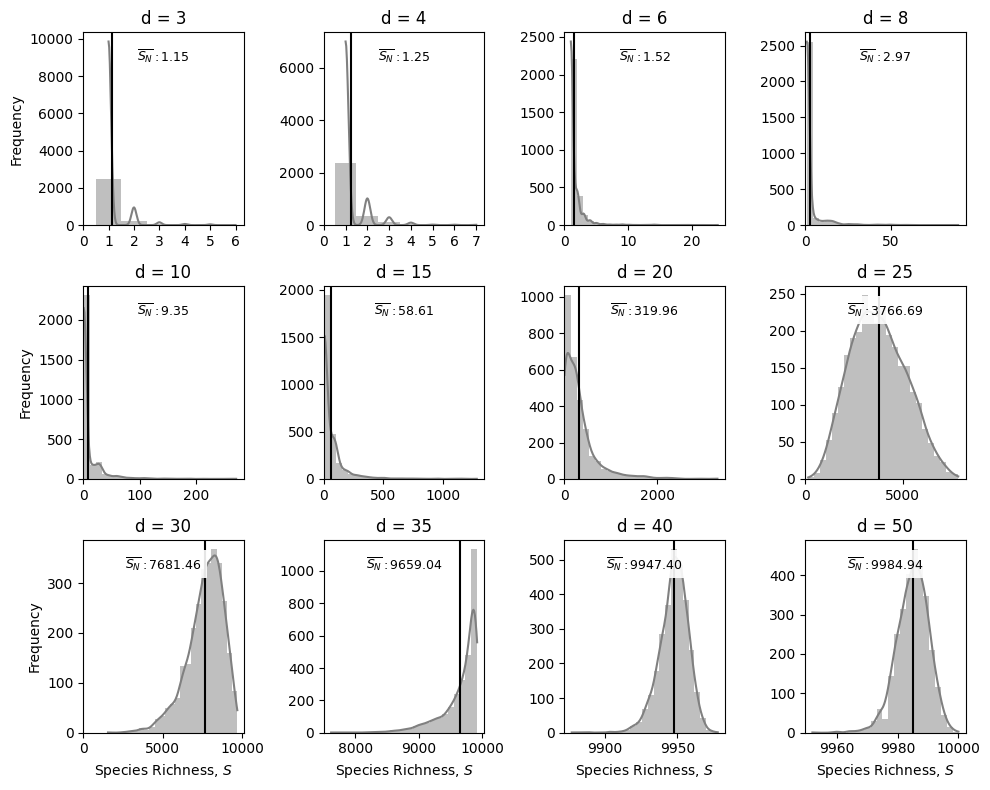

In [57]:
from matplotlib.ticker import MaxNLocator

# Define the number of rows and columns for the subplot grid
num_rows = 3  # You can adjust these values based on your preference
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array if necessary
axes = axes.flatten()

# Set the palette
palette = ['gray']

# Determine the indices of the last three plots
last_three_indices = [9, 10, 11]

# Iterate over each (dp, df) pair and plot on subplots
for idx, ((dp, df), ax) in enumerate(zip(sorted(dfs_int_keys.items()), axes)):
    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    
    # Set bins conditionally
    if idx == 0 or idx == 1:
        bins=np.arange(6)-0.5
    else:
        bins = 25
        
    sns.histplot(data=data_hist, x='Species_Count', bins=bins, color='gray', kde=True, edgecolor='none', ax=ax)
    
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax.axvline(x=mean_hist, color='black', linewidth=1.5, label='Mean')
    # Add text with the mean value
    ax.text(0.5, 0.85,transform=ax.transAxes, s=f'${{\\overline{{S_N}}}}: {mean_hist:.2f}$', color='black', ha='center', size=9, bbox=dict(facecolor='white', alpha = 0.9 , edgecolor='none'))
    
    ax.set_xlabel("Species Richness, $S$")
    ax.set_ylabel("Frequency")
    ax.set_title(f'$d = {dp}$')
    
    # Ensure the x-axis starts from 0 for plots except the last three
    if idx not in last_three_indices:
        ax.set_xlim(left=0)
        
    if idx == 0 or idx == 1:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Remove x labels from the first and second row
    if idx // num_cols < 2:
        ax.set_xlabel('')
    
    # Remove y labels from the second, third, and fourth columns
    if idx % num_cols != 0:
        ax.set_ylabel('')

    ax.set_title(f'd = {dp}')

# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-S4_high_res.png', dpi=300, bbox_inches='tight')


In [43]:
# Calculating max and min values of diversity
for dp, df in sorted(dfs_int_keys.items()):
    
    data = df[df['Iteration_Number'] == 99999]
    
    mean = data['Species_Count'].mean()
    max = data['Species_Count'].max()
    min = data['Species_Count'].min()
    print(f"d = {dp}: Mean = {mean}, Max = {max}, Min = {min}") 

d = 3: Mean = 1.145901047309498, Max = 6, Min = 1
d = 4: Mean = 1.2508784258608574, Max = 7, Min = 1
d = 6: Mean = 1.5177206393328702, Max = 24, Min = 1
d = 8: Mean = 2.974403320650294, Max = 89, Min = 1
d = 10: Mean = 9.349655172413794, Max = 270, Min = 1
d = 15: Mean = 58.608498780912576, Max = 1283, Min = 1
d = 20: Mean = 319.9566281916754, Max = 3303, Min = 1
d = 25: Mean = 3766.689208128942, Max = 7856, Min = 159
d = 30: Mean = 7681.459785985502, Max = 9699, Min = 1563
d = 35: Mean = 9659.036123654047, Max = 9923, Min = 7615
d = 40: Mean = 9947.403672903672, Max = 9978, Min = 9877
d = 50: Mean = 9984.935338865836, Max = 10000, Min = 9952
